Creditworthiness Score: 6.743589743589743


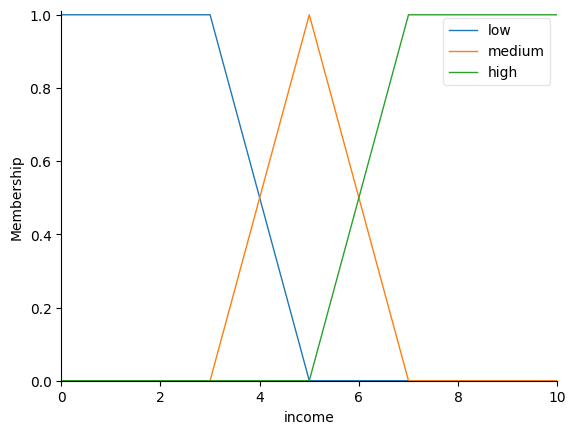

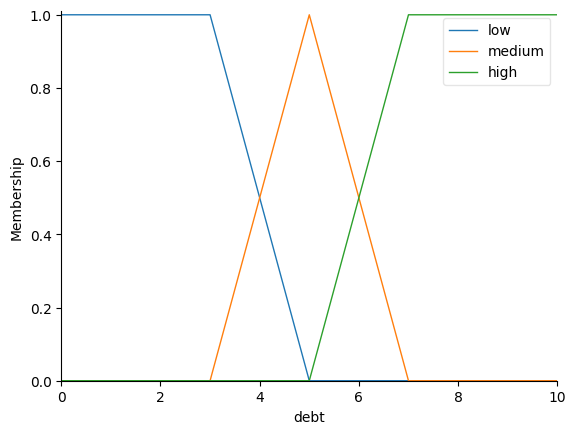

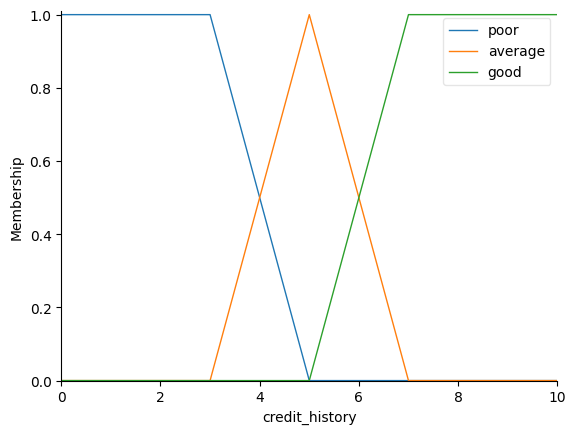

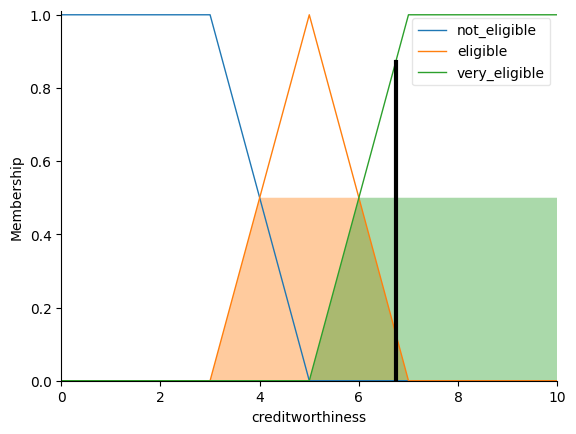

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Define fuzzy variables
income = ctrl.Antecedent(np.arange(0, 11, 1), 'income')
debt = ctrl.Antecedent(np.arange(0, 11, 1), 'debt')
credit_history = ctrl.Antecedent(np.arange(0, 11, 1), 'credit_history')
creditworthiness = ctrl.Consequent(np.arange(0, 11, 1), 'creditworthiness')

# 2. Define membership functions
income['low'] = fuzz.trapmf(income.universe, [0, 0, 3, 5])
income['medium'] = fuzz.trimf(income.universe, [3, 5, 7])
income['high'] = fuzz.trapmf(income.universe, [5, 7, 10, 10])

debt['low'] = fuzz.trapmf(debt.universe, [0, 0, 3, 5])
debt['medium'] = fuzz.trimf(debt.universe, [3, 5, 7])
debt['high'] = fuzz.trapmf(debt.universe, [5, 7, 10, 10])

credit_history['poor'] = fuzz.trapmf(credit_history.universe, [0, 0, 3, 5])
credit_history['average'] = fuzz.trimf(credit_history.universe, [3, 5, 7])
credit_history['good'] = fuzz.trapmf(credit_history.universe, [5, 7, 10, 10])

creditworthiness['not_eligible'] = fuzz.trapmf(creditworthiness.universe, [0, 0, 3, 5])
creditworthiness['eligible'] = fuzz.trimf(creditworthiness.universe, [3, 5, 7])
creditworthiness['very_eligible'] = fuzz.trapmf(creditworthiness.universe, [5, 7, 10, 10])

# 3. Define rules
rule1 = ctrl.Rule(income['high'] & debt['low'] & credit_history['good'], creditworthiness['very_eligible'])
rule2 = ctrl.Rule(income['low'] & debt['high'], creditworthiness['not_eligible'])
rule3 = ctrl.Rule(income['medium'] & credit_history['average'], creditworthiness['eligible'])
rule4 = ctrl.Rule(debt['medium'] & credit_history['good'], creditworthiness['eligible'])
rule5 = ctrl.Rule(income['low'] & debt['low'] & credit_history['good'], creditworthiness['eligible'])

# 4. Create control system
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
credit_simulation = ctrl.ControlSystemSimulation(credit_ctrl)

# 5. Simulate example inputs
credit_simulation.input['income'] = 6  # Example input
credit_simulation.input['debt'] = 4
credit_simulation.input['credit_history'] = 8

credit_simulation.compute()

# Output result
print(f"Creditworthiness Score: {credit_simulation.output['creditworthiness']}")

# 6. Visualize results
income.view()
debt.view()
credit_history.view()
creditworthiness.view(sim=credit_simulation)
plt.show()
